# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


# All the emotions

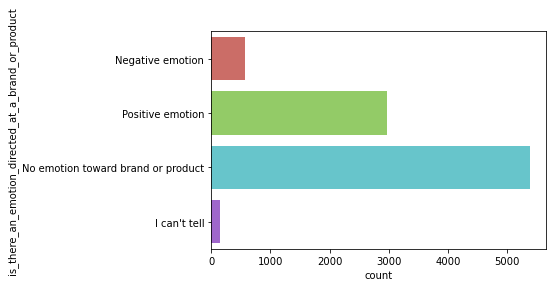

In [5]:
sns.countplot(y='is_there_an_emotion_directed_at_a_brand_or_product', data=df, palette='hls')
plt.show()

In [6]:
# neutral tweet
df['tweet_text'][5]

'@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd'

In [7]:
# positive tweet
df['tweet_text'][1]

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [8]:
# negative tweet
df['tweet_text'][3]

"@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw"

# Plot most common hashtags

In [9]:
# join the tweet_text column seperated by a comma
text = df['tweet_text'].str.cat(sep=', ')
text[:500]

".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW., @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW, @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW., @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw, @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim "

In [10]:
# find all the hashtags in the text
hashtags = re.findall(r"\s?([#][\w]+)", text)

# make all hashtags lowercase to count for later on
lowercase_hashtags = [word.lower() for word in hashtags]

In [11]:
import nltk
from nltk import FreqDist

In [12]:
# calculate the frequencies of the hashtags
hashtag_freqdist = FreqDist(lowercase_hashtags)
hashtag_freqdist.most_common(20)

[('#sxsw', 9120),
 ('#apple', 416),
 ('#google', 322),
 ('#sxswi', 318),
 ('#ipad2', 296),
 ('#iphone', 267),
 ('#ipad', 264),
 ('#android', 132),
 ('#austin', 112),
 ('#circles', 98),
 ('#tech', 87),
 ('#ubersocial', 68),
 ('#gsdm', 64),
 ('#japan', 58),
 ('#tapworthy', 54),
 ('#fb', 52),
 ('#qagb', 50),
 ('#infektd', 48),
 ('#winning', 44),
 ('#uxdes', 40)]

**The most common is SXSW which is an event that was happening at the time of these tweets. Its an event thats full of conferences and festivals that deal with technology, filming, and music. Apple and Google are right behind of course being the subject of these tweets.** 

Text(0.5, 0, 'Frequency')

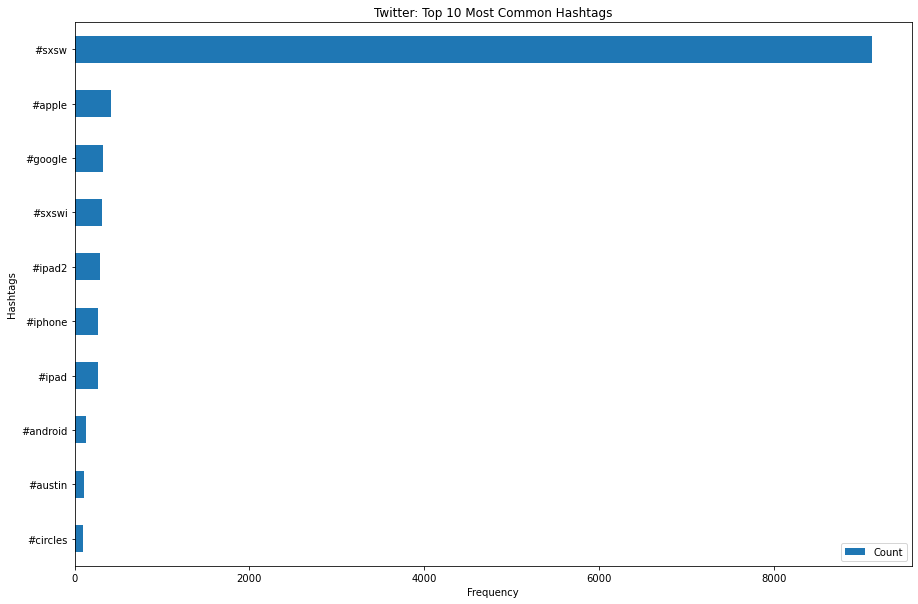

In [13]:
# turn the counts of each unique hashtag as a dataframe and sort values
df1 = pd.DataFrame(list(hashtag_freqdist.values()), hashtag_freqdist.keys(), columns = ['Count']).sort_values(by='Count')
# get the top most frequent hashtags from the bottom of dataframe
top_20_hashtags = df1[-10:]

# plt.figure(figsize=(20,20))
top_20_hashtags.plot(kind='barh', figsize=(15,10))
plt.title("Twitter: Top 10 Most Common Hashtags")
plt.ylabel("Hashtags")
plt.xlabel("Frequency")

# Plot to look at emotion vs brand/products

In [14]:
df2 = df.copy()

In [15]:
df2.dropna()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


Text(0, 0.5, 'Counts of Emotions')

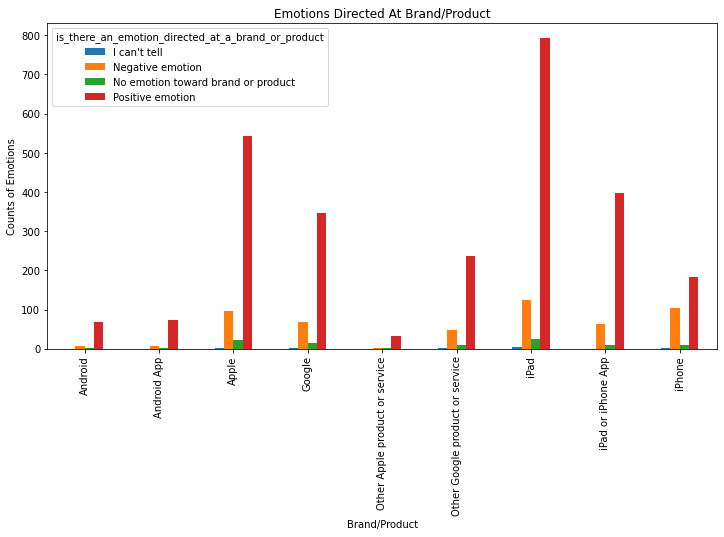

In [16]:
pd.crosstab(df2['emotion_in_tweet_is_directed_at'], df2['is_there_an_emotion_directed_at_a_brand_or_product']).plot(kind='bar', figsize=(12,6))
plt.title('Emotions Directed At Brand/Product')
plt.xlabel('Brand/Product')
plt.ylabel('Counts of Emotions')

**Overall Apple/products seems to have more tweets then Google, which means they have more positive tweets as well. It looks like ~14% of the tweets for Apple are negative where as ~20% of the tweets for Google are negative.**